In [1]:
import cluster_model

/home/lev/code/research/ai/lattice_cluster_paths/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lev/code/research/ai/lattice_cluster_paths/.venv/lib/python3.9/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
MODEL_NAME = 'EleutherAI/pythia-70m'
DATASET_NAME = 'NeelNanda/pile-10k'
MIXTURE_MODEL_TYPE = "KMenas"
# 
N_DIMS = 512
SEED = 69_420
# 
DEBUG = False
# 
if DEBUG:
    N_DATASIZE = 200
    N_CLUSTERS_MIN = 20
    N_CLUSTERS_MAX = 21
    N_BLOCKS = 6
    STRING_SIZE_CUTOFF = 200
else:
    # It gets killed aroun 1_800 idk why. Maybe we have a problem with token truncation somewhere
    N_DATASIZE = 1_800
# 
    # N_CLUSTERS_MIN = int(0.5 * N_DIMS)
    # N_CLUSTERS_MAX = 10 * N_DIMS
    # TODO: DEL ME
    N_CLUSTERS_MIN = N_DIMS
    N_CLUSTERS_MAX = N_DIMS + 1
    N_BLOCKS = 6
    STRING_SIZE_CUTOFF = 1_200

params = cluster_model.InterpParams(
	lattice_params=cluster_model.LatticeParams(
		top_layer_idx = -1,
        max_n_parents = 4
	),
    # quantization='4bit',
	seed=SEED,
    n_datasize=N_DATASIZE,
    n_blocks=N_BLOCKS,
    model_name=MODEL_NAME,
	model_n_dims=N_DIMS,
    dataset_name=DATASET_NAME,
    string_size_cutoff=STRING_SIZE_CUTOFF,
)

decomp = cluster_model.Decomposer(params)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model EleutherAI/pythia-70m into HookedTransformer
Moving model to device:  cpu
Creating decomposer with parameter data hash metadata/data-63f605fb4a8ab2a4def8c769bde1b72748e21f54/start.pkl
Creating decomposer with parameter lattice hash metadata/correlation-de5f2c593b55f095d11e400fd8f6d0964dc8512c/start.pkl
Created dataset
Loading dataset from cache
Got embeddings


In [3]:
decomp.load()

Loading cluster scores from cache
Using saved correlation for layer 0
Using saved correlation for layer 1
Using saved correlation for layer 2
Using saved correlation for layer 3
Using saved correlation for layer 4
Using saved correlation for layer 5


In [4]:
from typing import List
import importlib
import utils
importlib.reload(utils)
# modified_lattice = decomp.correlation_scores.copy()

# # TODO: have function which does something like fixing from the a specific neuron?
# # Ie have the sub-lattice with only **related** neurons

# def cutoff_lattice(lattice: List[List[List[float]]], related_cutoff = 1):
#     print(lattice[0].sum())
#     r = [(layer > related_cutoff) * layer for layer in lattice]
#     print(r[0].sum())
#     return r

# def create_sublattice(lattice, layer: int, idx_in_layer: int, related_cutoff = 10):
# 	with_cutoff = cutoff_lattice(lattice, related_cutoff)

# LAST_FEAT = 20
# modified_lattice = cutoff_lattice(decomp.correlation_scores, related_cutoff=15)

# # utils.top_k_dag_paths_dynamic(modified_lattice, k=10_000)

<module 'utils' from '/home/lev/code/research/ai/lattice_cluster_paths/utils.py'>

## Isolate Specific Neurons

In [5]:
LAYER = 0
NEURON = 128

In [6]:
import numpy as np
import kernel
from IPython.core.display import display, HTML
from circuitsvis.utils.render import render
import graph
importlib.reload(cluster_model)
importlib.reload(utils)
importlib.reload(graph)
importlib.reload(kernel)

N_CHECK = 4

# decomp.scores_for_neuron(LAYER, NEURON, n_features_per_neuron=3)

/tmp/ipykernel_181501/2553305548.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Look at distributions of scores

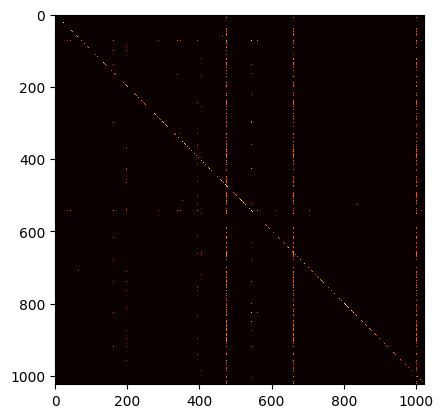

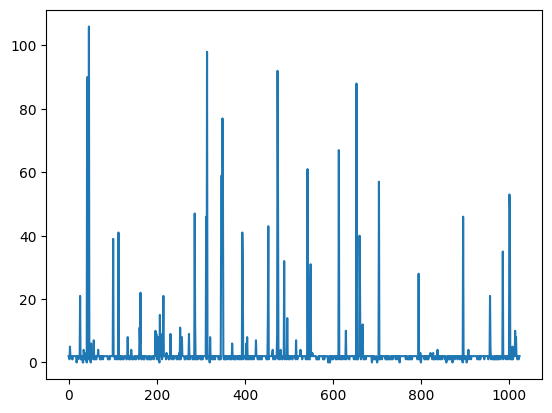

In [7]:
import matplotlib.pyplot as plt

# Get distribution of lattice scores

LAYER_START = 4
cutoff = 0.3

# ax = sns.heatmap(decomp.correlation_scores[LAYER_START])
plt.imshow(decomp.correlation_scores[LAYER_START] * (decomp.correlation_scores[LAYER_START] > cutoff), cmap='hot', interpolation='nearest')
plt.show()

plt.plot((decomp.correlation_scores[3] > cutoff).sum(axis=1))

## Lets look at the distribution of internal correlations

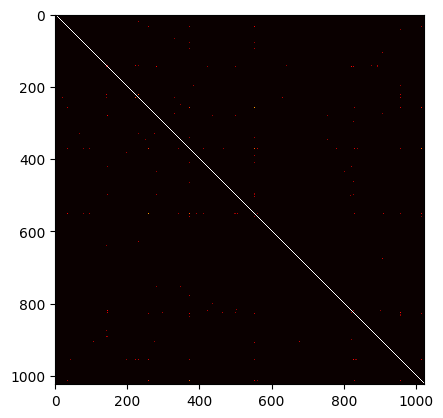

In [8]:
cutoff = 0.2
plt.imshow(decomp.internal_correlations[0] * (decomp.internal_correlations[0] > cutoff), cmap='hot', interpolation='nearest')
plt.show()

## Get scores for layers

In [9]:
importlib.reload(graph)
decomp.scores_for_layer(0)

WEIGHTING PER LAYER [1.      0.8     0.64    0.512   0.4096  0.32768]
EDGE DISCOVERY WEIGHTING PER LAYER [1. 1. 1. 1. 1.]
Getting top 10 paths
Looking for disjoint paths
([0, 113, 46, 653, 653, 474], 3.35639615875965)
([0, 46, 653, 46, 496, 497], 3.21248615875965)
([0, 827, 827, 827, 827, 827], 3.09181615875965)
([0, 753, 957, 957, 957, 957], 3.03215615875965)
([0, 496, 314, 314, 46, 346], 3.02920615875965)
([0, 956, 956, 956, 956, 956], 3.0044661587596497)
([0, 35, 35, 35, 35, 35], 2.99702615875965)
([0, 481, 481, 481, 481, 481], 2.96280615875965)
([0, 197, 197, 197, 197, 197], 2.92037615875965)
([0, 66, 66, 66, 66, 66], 2.8597661587596503)
Got top 10 paths
Paths for neuron 0 [([0, 113, 46, 653, 653, 474], 3.35639615875965), ([0, 46, 653, 46, 496, 497], 3.21248615875965), ([0, 827, 827, 827, 827, 827], 3.09181615875965), ([0, 753, 957, 957, 957, 957], 3.03215615875965), ([0, 496, 314, 314, 46, 346], 3.02920615875965), ([0, 956, 956, 956, 956, 956], 3.0044661587596497), ([0, 35, 35, 35

KeyboardInterrupt: 

In [ ]:
# TODO: LAYER 0 and NEURON 112... I think that its actually no path on the downstream?
decomp.scores_for_layer(1)

WEIGHTING PER LAYER [0.8    1.     0.8    0.64   0.512  0.4096]
EDGE DISCOVERY WEIGHTING PER LAYER [1. 1. 1. 1. 1.]
Getting top 10 paths
Looking for disjoint paths
([1, 0, 957, 957, 957, 957], 2.760997711811145)
([1, 0, 653, 653, 653, 474], 2.723717711811145)
([1, 0, 35, 35, 35, 35], 2.6727077118111446)
([1, 0, 197, 197, 197, 197], 2.655767711811145)
([1, 0, 312, 46, 496, 497], 2.6312977118111447)
([1, 0, 481, 481, 481, 346], 2.6086677118111448)
([1, 0, 827, 827, 827, 827], 2.5859977118111446)
([1, 0, 470, 470, 470, 470], 2.5352977118111446)
([1, 0, 496, 314, 46, 660], 2.5315777118111447)
([1, 0, 801, 801, 801, 801], 2.4807077118111445)
Got top 10 paths
Paths for neuron 0 [([1, 0, 957, 957, 957, 957], 2.760997711811145), ([1, 0, 653, 653, 653, 474], 2.723717711811145), ([1, 0, 35, 35, 35, 35], 2.6727077118111446), ([1, 0, 197, 197, 197, 197], 2.655767711811145), ([1, 0, 312, 46, 496, 497], 2.6312977118111447), ([1, 0, 481, 481, 481, 346], 2.6086677118111448), ([1, 0, 827, 827, 827, 827